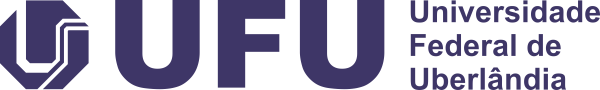

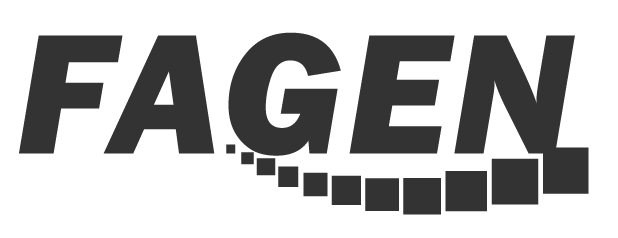

# **Análise de Cluster - Python**

## Prof. Dr. José Eduardo Ferreira Lopes

### Introdução

Objetiva-se com este notebook apresentar o processo de <b>Análise de Cluster (Análise de Agrupamentos, Segmentação, Análise de Conglomerados)</b> em Python, destacando os princpais pontos relacionados ao assunto.


### Fontes de pesquisa - Análise de Cluster

https://docs.aws.amazon.com/sagemaker/latest/dg/algo-kmeans-tech-notes.html

### Pontos de Aprendizagem:

> - Identificação de situações que sejam apropriadas à utilização da técnica de <b>análise de agrupamentos</b>
>
> - Principais medidas de <b>similaridade ou distância</b> utilizadas em análise de agrupamentos.
>
> - Principais diferenças entre os <b>modelos hierárquicos</b> e os não <b>hierárquicos</b>
>
> - Resultados apresentados pelas técnicas
>
> - <b>Número de agrupamentos</b> mais adequados para solucionar o problema de pesquisa.
>
> - Elementos que compõem cada agrupamento - <b>Perfil dos Grupos</b>.


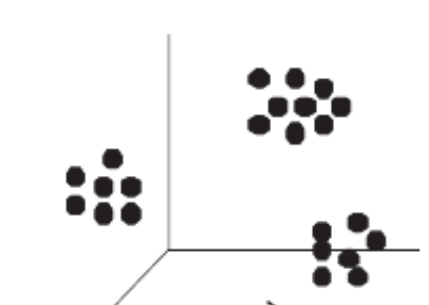

### O que é?

> - É um grupo de técnicas multivariadas cuja finalidade principal é agregar objetos com base nas características que eles possuem.
> - Os agrupamentos são feitos baseando-se em distância (proximidade).
> - Cada objeto é semelhante aos outros no agrupamento com base em um conjunto de características escolhidas.
> - Os agrupamentos resultantes de objetos devem exibir elevada homogeneidade interna e elevada heterogeneidade externa





### Exemplos de Utilização:

> - Identificar grupos de investimentos de acordo com perfis de risco
> - Identificar segmentos homogêneos de consumidores e estabelecer programas de marketing específicos para cada segmento
> - Identificar grupos de alunos mais propensos à evasão escolar
> - Buscar grupos de segurados de menor risco
> - Segmentar empresas com base em indicadores financeiros (rentabilidade, liquidez, margem, etc.)





### Atenção

Necessidade de forte apoio conceitual para contornar críticas:<br>
> - A análise de agrupamento é descritiva, não-teórica e não-inferencial
> - A análise de agrupamentos sempre criará agrupamentos, independentemente da existência real de alguma estrutura nos dados
> - A solução de agrupamentos não é generalizável, pois é totalmente dependente das variáveis usadas como base para a medida de similaridade




### Variáveis - Seleção e Análise

Seleção de variáveis e identificação de outliers
> - Os grupos a serem formados refletirão a estrutura inerente das variáveis escolhidas
> - A técnica não distingue se as variáveis são ou não relevantes para o estudo
>> - Variáveis não representativas ou a presença de multicolinearidade podem distorcer os resultados do estudo
> - Técnica altamente sensível à inclusão de variáveis com comportamentos atípicos
>> - É possível que objetos atípicos formem grupos isolados e, portanto, as observações atípicas não devem ser eliminadas do estudo.



### Bibliotecas utilizadas

<p>As principais bibliotecas utilizadas são:<br>
<a href="https://pandas.pydata.org/">Pandas</a>;<br>
<a href="https://matplotlib.org/">Matplotlib</a>;<br>  
<a href="https://docs.scipy.org/doc/scipy/reference/tutorial/index.html">scipy</a><br>
<a href="https://scikit-learn.org/stable/modules/clustering.html">sklearn</a><br>    
<a href="http://www.statsmodels.org/stable/index.html">statsmodels</a><br>   
</p>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy as sp
from scipy import stats as st
import researchpy as rs
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels as stm


### Dados

Os dados aqui utilizados acompnham o livro-texto do Hair jr. HAIR JR., J. F. et al. <b>Análise Multivariada de Dados</b>. 6. ed. Bookman: Porto Alegre, 2009. O arquivo de dados se chama HBAT e contém informações a respeito de pesquisa respondida pelos clientes, avaliando atributos/características da empres HBAT.<br>

<pre>
ID - Identificador do Cliente              X1 - Longevidade do Cliente
X2 - Tipo de Indústria                     X3 - Tamanho da Empresa
X4 - Região                                X5 - Sistema de Distribuição
X6 - Qualidade do Produto                  X7 - Atividades de E-Comerce
X8 - Suporte Técnico                       X9 - Resolução de Reclamações
X10 - Propaganda                           X11 - Linha de Produtos
X12 - Imagem da Força de Vendas            X13 - Preços Competitivos
X14 - Garantias                            X15 - Novos Produtos
X16 - Pedidos e Faturamento                X17 - Flexibilidade de Preços
X18 - Velocidade de Entrega                X19 - Satisfação
X20 - Recomendaria                         X21 - Recompraria
X22 - Nível de Compra                      X23 - Consideraria Aliança Estratégica
</pre>

Da variável X6 Até a variável X18, representam a nota que cada um dos clientes pesquisados atribuíram para os respectivos atributos. Notas entre 0 e 10.

<p>Leitura / Carga da planilha de Clientes do Excel: 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel/">read_excel</a>
</p>

In [2]:
df = pd.read_excel("../DADOS/HBAT.xlsx", sheet_name = "HBAT")

<p>Visualização de n primeiras linhas do arquivo (head): 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head().</a> 
    Por <i>default</i>, são apresenadas as cinco primeiras linhas. Ao passar o parâmetro, serão exibidas as n primieras linhas.<br>
</p>

In [3]:
df.head(3)

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,1,Entre 1 e 5 Anos,Indústria de Revista,Grande (500+),Fora da América do Norte,Direto,8.5,3.9,2.5,5.9,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,Sim
1,2,Acima de 5 Anos,Indústria de Jornal,Pequena (0 to 499),USA/América do Norte,Indireto,8.2,2.7,5.1,7.2,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,Não
2,3,Acima de 5 Anos,Indústria de Revista,Grande (500+),Fora da América do Norte,Direto,9.2,3.4,5.6,5.6,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,Sim


<p>Resumo do arquivo (info): 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html">info()</a> Valores e Tipo de Dados <br>
</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
id     100 non-null int64
x1     100 non-null object
x2     100 non-null object
x3     100 non-null object
x4     100 non-null object
x5     100 non-null object
x6     100 non-null float64
x7     100 non-null float64
x8     100 non-null float64
x9     100 non-null float64
x10    100 non-null float64
x11    100 non-null float64
x12    100 non-null float64
x13    100 non-null float64
x14    100 non-null float64
x15    100 non-null float64
x16    100 non-null float64
x17    100 non-null float64
x18    100 non-null float64
x19    100 non-null float64
x20    100 non-null float64
x21    100 non-null float64
x22    100 non-null float64
x23    100 non-null object
dtypes: float64(17), int64(1), object(6)
memory usage: 18.8+ KB


<p>Dimensionalidade dos Dados - Número de Linhas e Colunas: 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html">info()</a><br>
</p>

In [5]:
df.shape

(100, 24)

## Exploração dos Dados

### Estatística Descritiva

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html">describe()</a> <br>
</p>

A função describe() gera as estatísticas descritivas que sumarizam a tendência central, dispersão e forma de distribuição de um conjunto de dados. <br>
Por padrão, as estatísticas geradas são para variáveis métricas. Com o parâmetro <b>include='all'</b>, são geradas as estatísticas para todos os tipos de variáveis.



In [4]:
df.describe().round(2)

,id,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,50.50,7.81,3.67,5.36,5.44,4.01,5.80,5.12,6.97,6.04,5.15,4.28,4.61,3.89,6.92,7.02,7.71,58.40
std,29.01,1.40,0.70,1.53,1.21,1.13,1.32,1.07,1.55,0.82,1.49,0.93,1.21,0.73,1.19,1.04,0.94,8.86
min,1.00,5.00,2.20,1.30,2.60,1.90,2.30,2.90,3.70,4.10,1.70,2.00,2.60,1.60,4.70,4.60,5.50,37.10
25%,25.75,6.57,3.28,4.25,4.60,3.18,4.70,4.50,5.88,5.40,4.10,3.70,3.70,3.40,6.00,6.30,7.10,51.10
50%,50.50,8.00,3.60,5.40,5.45,4.00,5.75,4.90,7.10,6.10,5.00,4.40,4.35,3.90,7.05,7.00,7.70,58.60
75%,75.25,9.10,3.92,6.62,6.32,4.80,6.80,5.80,8.40,6.60,6.30,4.80,5.60,4.43,7.62,7.60,8.40,65.35
max,100.00,10.00,5.70,8.50,7.80,6.50,8.40,8.20,9.90,8.10,9.50,6.70,7.30,5.50,9.90,9.90,9.90,77.10


#### Análise das Variáveis Não Métricas

In [5]:
#X1 - Longevidade do Cliente
df.groupby('x1').count()['id']

x1
Acima de 5 Anos     33
Entre 1 e 5 Anos    35
Menos de 1 Ano      32
Name: id, dtype: int64

Para manter a ordem lógica (crescente) de visualização dos valores, eles serão recodificados.

In [6]:
df["x1"] = df["x1"].replace('Menos de 1 Ano', '1 - Menos de 1 Ano')
df["x1"] = df["x1"].replace('Entre 1 e 5 Anos', '2 - Entre 1 e 5 Anos')
df["x1"] = df["x1"].replace('Acima de 5 Anos', '3 - Acima de 5 Anos')

In [7]:
# X2 - Tipo de Indústria 
df.groupby('x2').count()['id']

x2
Indústria de Jornal     48
Indústria de Revista    52
Name: id, dtype: int64

In [8]:
#X3 - Tamanho da Empresa
df.groupby('x3').count()['id']

x3
Grande (500+)         51
Pequena (0 to 499)    49
Name: id, dtype: int64

Para manter a ordem lógica (crescente) de visualização dos valores, eles serão recodificados.

In [9]:
df["x3"] = df["x3"].replace('Pequena (0 to 499)', '1 - Pequena (0 to 499)')
df["x3"] = df["x3"].replace('Grande (500+)', '2 - Grande (500+)')

In [10]:
# X4 - Região
df.groupby('x4').count()['id']

x4
Fora da América do Norte    61
USA/América do Norte        39
Name: id, dtype: int64

In [11]:
# X5 - Sistema de Distribuição
df.groupby('x5').count()['id']

x5
Direto      43
Indireto    57
Name: id, dtype: int64

## Padronização das Variáveis

A maioria das análises de agrupamento usando medidas de distância é bastante sensível a diferentes escalas ou magnitudes entre as variáveis. Em geral, variáveis com maior dispersão têm maior impacto sobre o valor da similaridade final.
> - A utilização de variáveis com medidas/escalas diferentes pode distorcer a estrutura do agrupamento.
> - A padronização de variáveis faz com que seja atribuído o mesmo peso para cada variável.


### Escore Padrão ( Z score):
<FONT SIZE="4">
$\begin{aligned}
  z = \frac{x - \mu}{\sigma}
\end{aligned}$
</FONT>

### Método Range -1 a 1: A variável padronizada tem amplitude 1:
<FONT SIZE="4">
$\begin{aligned}
  xp = \frac{x }{amplitude}
 \end{aligned}$
</FONT>

### Método Range 0 a 1: A variável padronizada apresenta variação de 0 a 1: 

<FONT SIZE="4">
$\begin{aligned}
 xp = \frac{x -minimo}{amplitude}
 \end{aligned}$
</FONT>

### Método de máxima amplitude: A variável padronizada tem valor máximo igual a 1: 
<FONT SIZE="4">
$\begin{aligned}
  xp = \frac{x }{minimo}
\end{aligned}$
</FONT></b>

### Método de média 1: A variável padronizada tem média  1: 
<FONT SIZE="4">
$\begin{aligned}
  xp = \frac{x }{\mu}
\end{aligned}$
</FONT>

### Método de desvio padrão 1: A variável padronizada tem desvio padrão  1: 
<FONT SIZE="4">
$\begin{aligned}
  xp = \frac{x }{\sigma}
 \end{aligned}$
</FONT>


#### Padronização Utilizando o Score Padrão Z

Neste exemplo, iremos utilziar as variáveis padronizadas pelo score padrão <i>Z</i>. Definimos um vertor com os nomes das variáveis **variaveis** antes da padrinização e outro vetor com os mesmos nomes das variáveis **z_variaveis**, acescentando-se o prefixo **z_**

In [12]:
variaveis = ["x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18"]

In [13]:
variaveis

['x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18']

In [14]:
z_variaveis = []
for var in variaveis:
    z_variaveis.append("z_" + var)

In [15]:
z_variaveis

['z_x6',
 'z_x7',
 'z_x8',
 'z_x9',
 'z_x10',
 'z_x11',
 'z_x12',
 'z_x13',
 'z_x14',
 'z_x15',
 'z_x16',
 'z_x17',
 'z_x18']

#### Padronizando - Escore Padrão Z

<p> Função Utilizada: <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandarScaler()</a> <br>
</p>


In [16]:
X = df[variaveis]
X_std = StandardScaler().fit_transform(X)

In [17]:
X_std

array([[ 0.49666   ,  0.32711386, -1.88142087, ...,  0.78122974,
         0.40834751, -0.254531  ],
       [ 0.28072087, -1.39453802, -0.17402322, ..., -0.40900948,
        -0.2583423 ,  1.3876045 ],
       [ 1.00051797, -0.39024109,  0.15432248, ...,  1.214044  ,
        -0.50835098,  0.840226  ],
       ...,
       [ 0.64061942, -0.67718307, -1.35606775, ..., -1.274638  ,
        -1.42504948, -1.89666651],
       [-0.00719797,  1.76182375,  0.28566076, ...,  0.02380478,
         0.24167506,  0.01915825],
       [ 0.06478174, -0.96412505, -0.6337072 , ..., -0.9500273 ,
         0.65835619, -0.52822025]])

Acrescenta as variáveis padronizadas ao arquivo original

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html">concat()</a> <br>
</p>

In [18]:
df = pd.concat([df, pd.DataFrame(X_std, columns=z_variaveis)], axis=1)

In [19]:
df.head(3)

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z_x9,z_x10,z_x11,z_x12,z_x13,z_x14,z_x15,z_x16,z_x17,z_x18
0,1,2 - Entre 1 e 5 Anos,Indústria de Revista,2 - Grande (500+),Fora da América do Norte,Direto,8.5,3.9,2.5,5.9,...,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,-0.572173,0.781230,0.408348,-0.254531
1,2,3 - Acima de 5 Anos,Indústria de Jornal,1 - Pequena (0 to 499),USA/América do Norte,Indireto,8.2,2.7,5.1,7.2,...,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.774117,-0.409009,-0.258342,1.387605
2,3,3 - Acima de 5 Anos,Indústria de Revista,2 - Grande (500+),Fora da América do Norte,Direto,9.2,3.4,5.6,5.6,...,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,-0.370230,1.214044,-0.508351,0.840226


### Medidas de Distância e Similaridade

> - O conceito de similaridade é fundamental na análise de agrupamentos.A <b>similaridade entre objetos</b> é uma medida empírica de correspondência, ou semelhança, entre objetos a serem agrupados.
> - Mesmo que as medidas correlacionais tenham um apelo intuitivo e sejam usadas em muitas outras técnicas multivariadas, na análise de agrupamento, as medidas de similaridade mais utilizadas são as medidas de distância.

__<FONT SIZE="3">Distância Euclidiana: </FONT>__ a distância entre duas observações ( 𝑖 e 𝑗) corresponde à raiz quadrada da soma dos quadrados das diferenças entre os pares de observações ( 𝑖 e 𝑗) para todas as 𝑝 variáveis:<br>
<FONT SIZE="4">
$\begin{aligned}
  d_{i,j} = \sqrt[2]{\displaystyle\sum_{k=1}^{p} (x_{ik} - x_{jk})^2}
 \end{aligned}$<br>
$\begin{aligned}    
 d_{i,j} = \sqrt[2]{(x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2 + ... + (x_{ip} - x_{jp})^2}
 \end{aligned}$
</FONT>

Em que $\begin{aligned}  x_{ik} \end{aligned}$  é o valor da variável 𝑘 referente à observação 𝑖 e $\begin{aligned}  x_{jk} \end{aligned}$  para a observação 𝑗. Nesta abordagem, quanto menor a distância, mais similares serão as observações.

__<FONT SIZE="3">Distância Euclidiana Quadrática: </FONT>__ a distância entre duas observações ( 𝑖 e 𝑗) corresponde à soma dos quadrados da diferença entre  𝑖 e 𝑗 para todas as 𝑝 variáveis:<br>
<FONT SIZE="4">
$\begin{aligned}
  d_{i,j}^2 = \displaystyle\sum_{k=1}^{p} (x_{ik} - x_{jk})^2
 \end{aligned}$
</FONT>

> - Distância padrão utilizada pelo SPSS.
> - Recomendada para os métodos de agrupamento centroide e Ward

__<FONT SIZE="3">Distância de Minkowski: </FONT>__ a distância entre duas observações ( 𝑖 e 𝑗) corresponde à soma dos quadrados da diferença entre  𝑖 e 𝑗 para todas as 𝑝 variáveis:<br>
<FONT SIZE="4">
$\begin{aligned}
  d_{i,j} = (\displaystyle\sum_{k=1}^{p} (\mid x_{ik} - x_{jk}\mid)^n)^\frac{1}{n}
 \end{aligned}$
</FONT>

> - Em que 𝑑_𝑖𝑗 é a distância de Minkowski entre as observações 𝑖 e 𝑗, 𝑝 é o número de variáveis, e 𝑛=1, 2, . . . , ∞.<br>
> - Se aplicarmos n = 2 na formulação de Minkowski, chegaremos à distância euclidiana.
Para n = 1, temos a distância City-Block ou Manhattam Distance:<br>

<FONT SIZE="4">
$\begin{aligned}
  d_{i,j} = \displaystyle\sum_{k=1}^{p} \mid x_{ik} - x_{jk}\mid
 \end{aligned}$
</FONT>

__<FONT SIZE="3">Distância de Mahalanobis:</FONT> __ <br>

<FONT SIZE="4">
$\begin{aligned}    
 d_{i,j} =  \sqrt[2]{(x_{i} - x_{j})^T S^{-1} (x_{i} - x_{j})}
 \end{aligned}$
</FONT>

Em que S é a estimativa amostral da matriz de variância - covariância Σ dentro dos agrupamentos

__<FONT SIZE="3">Distância de Chebychev:</FONT>__ <br>

<FONT SIZE="4">
$\begin{aligned}    
 d_{i,j} =  max_{k} \mid x_{ik} - x_{jk} \mid
 \end{aligned}$
</FONT> 


__<FONT SIZE="3">Correlação de Pearson:</FONT>__ <br>


<FONT SIZE="4">
$\begin{aligned}  
r = \frac{{}\sum_{k=1}^{p} (x_{1k} - \overline{x_i})(x_{1j} - \overline{x_j})}
{\sqrt{\sum_{k=1}^{p} (x_{1k} - \overline{x_i})^2 \sum_{k=1}^{p} (x_{1j} - \overline{x_j})^2}}
 \end{aligned}$
</FONT>

Sendo:
> - $\begin{aligned} x_{ik}  \end{aligned}$ = valor da variável 𝑘 para a observação 𝑖;
> - $\begin{aligned} x_{jk}  \end{aligned}$ = valor da variável 𝑘 para a observação 𝑗;
> - $\begin{aligned} \overline{x_i} \end{aligned}$ = representa a média de todas as variáveis para o indivíduo 𝑖
> - $\begin{aligned} \overline{x_j} \end{aligned}$ = representa a média de todas as variáveis para o indivíduo 𝑗
> - 𝑝 =  representa o número de variáveis



### Cálculo de Matrizes de Distância

<p> Função Utilizada: <br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist">scipy.spatial.distance.cdist()</a> <br>
</p>

<p> Outra opção é função: <br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance_matrix.html">distance_matrix()</a>.<br>
    Contudo, esta função só calcula a distância de <b>Minkowski</b> e suas derivações<br>
</p>

Observe que no exemplo, a distância calculada foi a a **euclidiana**. Contudo, várias outras podem ser calculadas mudando apenas este parâmetro.<br>

**Opções:** ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘wminkowski’, ‘yule’.

In [20]:
distance.cdist(df[variaveis], 
               df[variaveis], 'sqeuclidean')

array([[ 0.  , 35.62, 26.73, ..., 33.82, 19.7 , 22.91],
       [35.62,  0.  , 19.83, ..., 31.9 , 46.52, 53.97],
       [26.73, 19.83,  0.  , ..., 39.97, 25.67, 50.72],
       ...,
       [33.82, 31.9 , 39.97, ...,  0.  , 52.7 , 47.45],
       [19.7 , 46.52, 25.67, ..., 52.7 ,  0.  , 17.17],
       [22.91, 53.97, 50.72, ..., 47.45, 17.17,  0.  ]])

### Observações atípicas

> - Técnica altamente sensível à inclusão de variáveis com comportamentos atípicos
>> - É possível que objetos atípicos formem grupos isolados e, portanto, as observações atípicas não devem ser eliminadas do estudo.


**Outlier:** Observações com uma combinação única de características identificáveiscomo distinta das outras observações
> - Impacto
>> - Limita a generalização de qualquer tipo de análise
>> - Deve ser visto à luz de quão representante é da população para ser mantido ou excluído

> - Fontes de observações atípicas (outlier) 
>> - Erro de procedimento
>> - Evento extraordinário
>> - Observações extraordinárias

> - Detecção de observações atípicas
>> - Métodos univariados: Examine todas as variáveis para identificar observações únicas ou extremas.
>>> - A Análise gráfica é bom caminho para verificação (Box Plot)
>>> - Para pequenas amostras (80 observações ou menos), observações atípicas geralmente são definidas como casos com escores padrão de 2,5 ou mais
>>> - Para amostras maiores, aumente o valor de referência de escores padrão para até 4.
>>> - Se escores padrão não são usados, identifique casos que recaiam fora dos intervalos de desvio padrão de 2,5 versus 4, dependendo do tamanho da amostra.
>> - Métodos bivariados: Concentre seu uso em relações específicas de variáveis, como o caso independente versus dependente.
>>> - Use diagramas de dispersão com intervalos de confiança em um nível alfa especificado
>> - Métodos multivariados: mais adequados para examinar uma variável estatística completa, com as variáveis independentes na regressão ou as variáveis na análise fatorial.
>>> - Os limiares para a medida D²/gl devem ser conservadoras (0.005 ou 0.001), resultando em valores de 2,5 (pequenas amostras) versus 3 ou 4 em amostras maiores
>>>> - D²: medida de Mahalanobis
>>>> - gl: graus de liberdade


### Outlier Univariado

Análise Gráfica: 
<p>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html">Box Plot</a> <br>
</p>


(-3, 3)

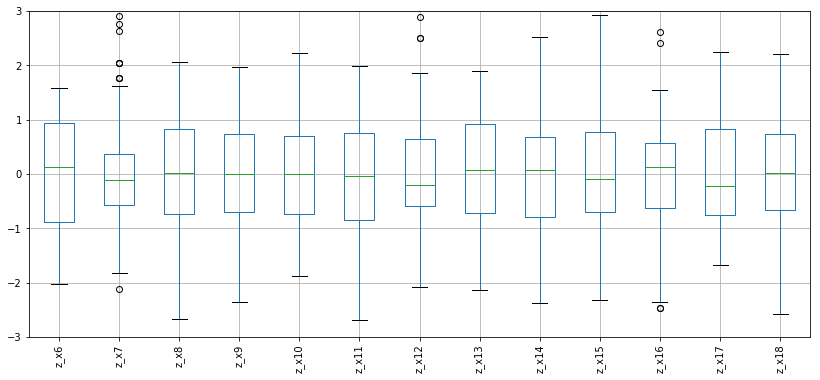

In [21]:
df[z_variaveis].boxplot(rot=90,figsize=[14,6])
plt.ylim(-3,3)

### Multivariado - D2 de Mahalanobis 

A distância de Mahalanobis é a distância entre um ponto e uma distribuição e não a distância entre dois pontos. É equivalente à distância euclidiana

<p>Uma boa referência pode ser encontrada em:
<a href="https://www.machinelearningplus.com/statistics/mahalanobis-distance/">Mahalanobis</a> <br>
</p>


Neste caso ilustrado a seguir, usou-se a distância de Mahalanobis para calcular a distância de cada observação (vetor de variáveis) até a média (vetor das médias.
<p>
<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html">numpy.mean</a><br>
<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html">numpy.cov</a><br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html">DataFrame Transpose (T)</a><br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html">scipy.linalg.inv</a><br>
<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html">numpy.dot</a><br>
<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.diagonal.html">numpy.diagonal</a><br>
</p>


In [22]:
def mahalanobis(x=None, data=None, cov=None):
    """Computa a Distância de Mahalanobis entre cada objeto e a média  
    x    : vetor ou matriz de dados, com p colunas.
    data : ndarray dos dados a partir do qual a a Distância de Mahalanobis para cada observação de x deve ser computado.
    cov  : Matriz de covariancia (p x p) dos dados. Se None, ela será calculada a partir dos dados.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [23]:
# Calcula a distância de Mahalanobis para cada um dos casos.
df['mahala'] = mahalanobis(x=df[variaveis], data=df[variaveis])
df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z_x10,z_x11,z_x12,z_x13,z_x14,z_x15,z_x16,z_x17,z_x18,mahala
0,1,2 - Entre 1 e 5 Anos,Indústria de Revista,2 - Grande (500+),Fora da América do Norte,Direto,8.5,3.9,2.5,5.9,...,0.704543,-0.691530,0.821973,-0.113185,-1.646582,-0.572173,0.781230,0.408348,-0.254531,10.345972
1,2,3 - Acima de 5 Anos,Indústria de Jornal,1 - Pequena (0 to 499),USA/América do Norte,Indireto,8.2,2.7,5.1,7.2,...,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.774117,-0.409009,-0.258342,1.387605,16.279348
2,3,3 - Acima de 5 Anos,Indústria de Revista,2 - Grande (500+),Fora da América do Norte,Direto,9.2,3.4,5.6,5.6,...,1.239639,1.218774,0.634522,-1.609304,0.192489,-0.370230,1.214044,-0.508351,0.840226,12.247606
3,4,1 - Menos de 1 Ano,Indústria de Jornal,2 - Grande (500+),Fora da América do Norte,Indireto,6.4,3.3,7.0,3.7,...,0.615361,-0.844354,-0.583910,1.187789,1.173327,-1.043375,0.023805,-0.425015,-1.212443,14.334786
4,5,2 - Entre 1 e 5 Anos,Indústria de Revista,2 - Grande (500+),USA/América do Norte,Direto,9.0,3.4,5.2,4.6,...,-1.614207,0.149004,-0.583910,-0.113185,0.069885,-0.437544,0.240212,-0.925032,-0.528220,6.017701


In [24]:
# Os casos mais distantes da média. Os mais diferentes.
df.loc[df['mahala'] > 30]

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z_x10,z_x11,z_x12,z_x13,z_x14,z_x15,z_x16,z_x17,z_x18,mahala
23,24,3 - Acima de 5 Anos,Indústria de Revista,2 - Grande (500+),Fora da América do Norte,Direto,9.3,2.4,2.6,7.2,...,-1.614207,1.065950,-0.583910,-0.503477,0.437699,-0.639488,2.620690,-0.175006,0.840226,32.412752
35,36,1 - Menos de 1 Ano,Indústria de Revista,1 - Pequena (0 to 499),USA/América do Norte,Indireto,8.7,3.2,6.1,4.3,...,-0.454832,0.225416,-2.083519,-0.893769,0.069885,0.908746,-1.274638,-1.425049,-1.896667,36.862155
83,84,1 - Menos de 1 Ano,Indústria de Jornal,1 - Pequena (0 to 499),Fora da América do Norte,Indireto,6.4,3.2,6.7,3.6,...,-1.614207,-2.219773,-0.115282,0.927594,1.541141,0.908746,-2.464877,-0.758360,-3.128268,31.536670
97,98,1 - Menos de 1 Ano,Indústria de Revista,1 - Pequena (0 to 499),USA/América do Norte,Direto,8.7,3.2,3.3,3.2,...,-0.811562,0.225416,-2.083519,-0.893769,-1.278767,-0.572173,-1.274638,-1.425049,-1.896667,40.008367


## Métodos de Agrupamentos Hierárquicos

Técnica para particionar objetos em grupos homogêneos otimizados com base em medida empírica de similaridade

<p>Boas Referências:<br>
<a href="https://link.springer.com/content/pdf/10.1007%2FBF02289588.pdf">Hierarchical Clustering</a> <br>
<a href="https://arxiv.org/pdf/1109.2378v1.pdf">Hierarchical Clustering 1</a> <br>
<a href="https://academic.oup.com/bioinformatics/article/17/suppl_1/S22/261423">Hierarchical Clustering 2</a> <br>
<a href="https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/">Hierarchical Clustering 3</a> <br>
<a href="https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/">Hierarchical Clustering 4</a> <br>
<a href="https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019">Hierarchical Clustering 5</a> <br>
</p>


### Métodos Hierárquicos Aglomerativos
<img src="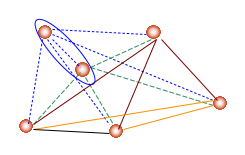
" align='right' width=250px;>
> - Esquema
>> - No início, cada indivíduo representa um grupo
>> - Para esses métodos os agrupamentos são formados a partir de uma matriz de parecença;
>> - Queremos identificar os objetos que mais se parecem;
>> - Agrupamos esses objetos e os consideramos como um único objeto;
>> - Definimos uma nova matriz de parecença.

> - Passos
>> - Começar com N clusters (um para cada sujeito) e calcular a matriz de distância (ou matriz de proximidade) 𝐷_(𝑁∗𝑁)
>> - Procurar na matriz D os pares de sujeitos 𝑖 e 𝑗 mais semelhantes (com menor 𝑑_𝑖𝑗. 
>> - Combinar os clusters 𝑖 e 𝑗 (os dois com menores 𝑑_𝑖𝑗) para formar o cluster 𝑖𝑗. Atualizar a matriz eliminando a linha e a coluna correspondentes ao cluster 𝑗 e adicionando uma nova linha e coluna com as distâncias entre o novo cluster 𝑖𝑗 e os restantes clusters originais
>> - Repetir os passos 2 e 3 N-1 vezes, tomando nota dos clusters criados em cada um dos passos e das distâncias entre estes

<img src="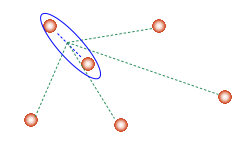
" align='right' width=250px;>

> - Após a formação do primeiro cluster, é preciso definir como a distância entre os dois clusters será computada. Os principais métodos são:

<img src="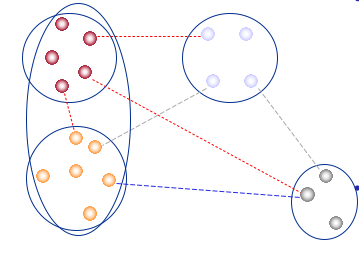
" align='right' width=250px;>
>> - Menor Distância ou Ligação Individual (Single Linkage / Nearest Neighbor)
>>> - A distância entre 
os grupos é definida como sendo a distância entre os elementos mais próximos (menor distância) dos dois grupos
>>> - 𝑑_(𝑖𝑗)𝑘=𝑚𝑖𝑛{𝑑_𝑖𝑘, 𝑑_𝑗𝑘 }


<img src="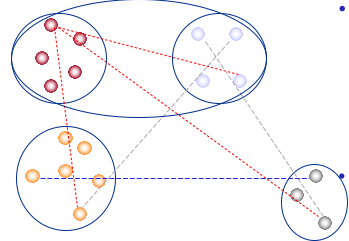
" align='right' width=250px;>

>> - Maior Distância ou Ligação Completa (Complete Linkage ou Furthest Neighbor)
>>> - A distância entre dois grupos é definida como sendo a menor das mais distantes entre os indivíduos dos dois grupos (distância máxima).
>>> - 𝑑_(𝑖𝑗)𝑘=𝑚𝑎𝑥{𝑑_𝑖𝑘, 𝑑_𝑗𝑘 }


<img src="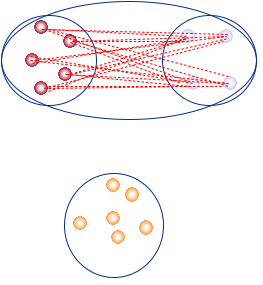
" align='right' width=250px;>

>> - Distância Média ou Ligação Média (Average Linkage ou Between Groups)
>>> - A distância entre dois grupos é definida como sendo a distância média entre todos os pares de indivíduos dos dois grupos, buscando-se a menor distância média entre os grupos.
>>> - 𝑑_(𝑖𝑗)𝑘=𝑚é𝑑𝑖𝑎{𝑑_𝑖𝑘, 𝑑_𝑗𝑘 }


<img src="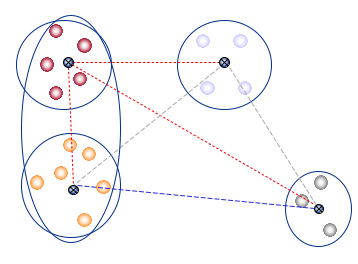
" align='right' width=250px;>

>> - Método do Centroide
>>> - Este método define a coordenada de cada grupo como sendo a média das coordenadas de seus objetos. Uma vez obtida essa coordenada, denominada centroide, a distância entre os grupos é obtida através do cálculo das distâncias entre os centroides.
>> - Método Ward
>>> - O método de Ward busca unir objetos que tornem os agrupamentos formados os mais homogêneos possível. A medida de homogeneidade utilizada baseia-se na partição da soma de quadrados total de uma análise de variância.
>>> - $\begin{aligned}  
\sum_{j=1}^{k}\sum_{i \in G_j} (x_{i1} - \overline{X_i})^2 = \sum_{j=1}^{k}n_j(\overline X_{ji} - \overline X_1)^2 + \sum_{j=1}^{k}\sum_{i \in G_j} (x_{i1} - \overline{X_{j1}})^2
 \end{aligned}$
>>> - O Método de Ward, é atraente por basear-se numa medida com forte apelo estatístico e por gerar grupos que, assim como os do método do vizinho mais longe, possuem alta homogeneidade interna.






## Aplicação - HBAT

<p>Bibliotecas e funções utilizadas:<br>
<a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy">module-scipy.cluster.hierarchy</a> <br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage">scipy.cluster.hierarchy.linkage</a> <br>
<a href="https://docs.scipy.org/doc/scipy/reference/cluster.vq.html#module-scipy.cluster.vq">module-scipy.cluster.vq</a> <br>
<a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html">dendrogram</a> <br>
</p>


> - Observe que no exemplo, a distância utilizada foi a **euclidiana quadrática** e o método foi **ligação compeleta**. A Ligação completa busca formar grupos mais homegêneos.
> - A função **linkage** retorna uma matriz <b>Z</b>, contendo o passo a passo da aglomeração  (**Planejamento da Aglomeração**) sendo que em cada linha são apresentados os dois clusters que estão se agrupandos, a distância entre eles e a quantidade de casos no cluster<br>


In [25]:
Z = linkage(df[z_variaveis], method='complete', metric='sqeuclidean')

In [26]:
print ('Planejamento da Aglomeração\n')
print(Z)

Planejamento da Aglomeração

[[  1.          44.           0.76138254   2.        ]
 [  4.          81.           1.99252112   2.        ]
 [  7.          69.           2.10113823   2.        ]
 [ 51.         100.           2.19737134   3.        ]
 [  8.          18.           2.37322188   2.        ]
 [ 29.          96.           2.72848889   2.        ]
 [ 78.          93.           2.73679302   2.        ]
 [ 36.          88.           3.00594608   2.        ]
 [ 16.          66.           3.18247649   2.        ]
 [ 26.          87.           3.23084353   2.        ]
 [ 43.          89.           3.28021524   2.        ]
 [ 31.          63.           3.2933682    2.        ]
 [  3.          64.           3.54616388   2.        ]
 [ 14.          17.           3.63377085   2.        ]
 [ 68.          85.           4.10848885   2.        ]
 [  6.          91.           4.13198693   2.        ]
 [ 53.          82.           4.36407806   2.        ]
 [ 55.          90.           4.3947

> - Observar que os dois primeiros casos a se agruparem foram os casos 1 e 44 (inicia com 0 - zero), cuja distância era 0.76138254 e naquele estágio (1), haviam dois casos no grupo.
> - O último caso individual a se juntar foi o caso 21, no estágio 96. Após a junção, este grupo ficou com 5 casos.


#### Dendrograma

O **dendrograma** fornece um retrato gráfico do processo de agrupamento. A estrutura em árvore do dendrograma retrata cada estágio do processo. Tipicamente, o gráfico é escalonado, de maneira que distâncias menores entre combinações indicam maior homegeneidade.<br>

O Eixo x contem os casos / grupos e o eixo y representa a distância entre os casos/grupos. Ao traçar (cortar) uma linha no valor 90 (eixo y), por exemplo, seriam formados dois grupos. No valor 70, três grupos, no valor 58, quatro grupos.


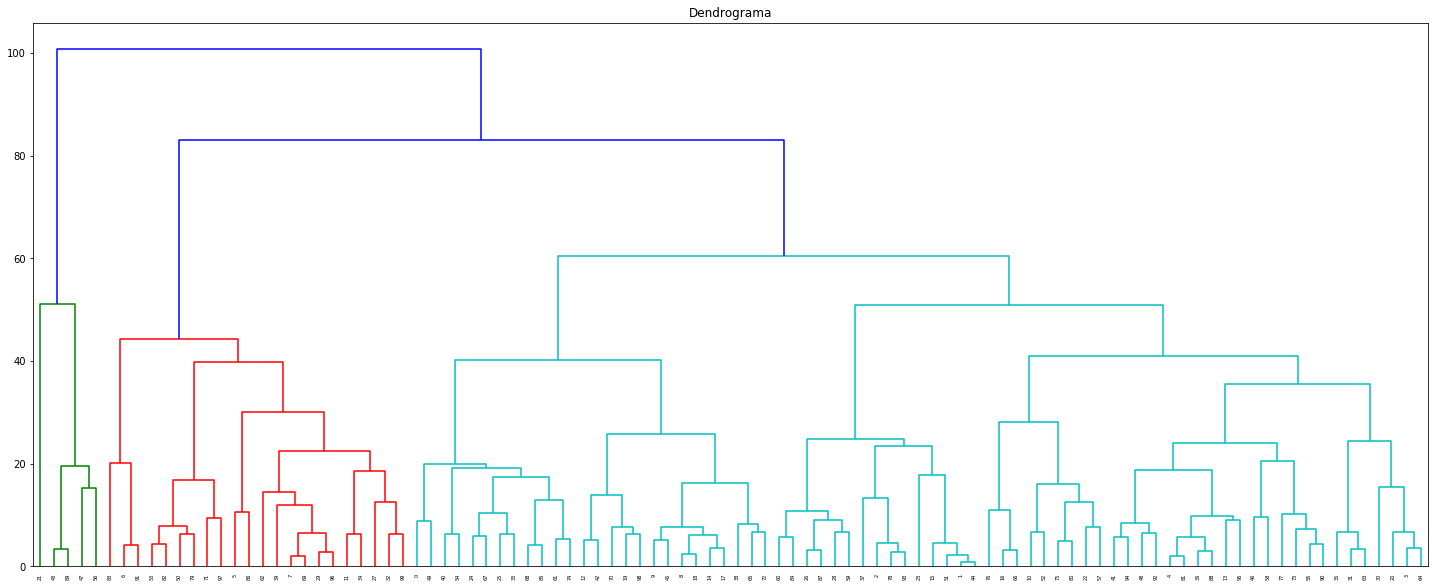

In [27]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.title("Dendrograma") 
plt.show()

#### Regras de Parada

Quantos agrupamentos devem ser gerados?

##### Variações percentuais em heterogeneidade
>- A regra de parada é baseada na avaliação de heterogeneidade entre soluções de agrupamentos. Quando ocorrem grandes aumentos de heterogeneidade, escolhe-se a situação anterior


In [28]:
# Transforma a matriz Z em um DataFrame. Neste caso, será um DataFrame com 99 linhas e 4 colunas (Cluster 1 - c1, Cluster 2 - c2, distãncia - dist e 
# quantidade de casos - n)
parada = pd.DataFrame(Z, columns=["c1", "c2", "dist", "n"])

In [29]:
# As primeiras 5 linhas do Daframe Criado
parada.head()

,c1,c2,dist,n
0,1.0,44.0,0.761383,2.0
1,4.0,81.0,1.992521,2.0
2,7.0,69.0,2.101138,2.0
3,51.0,100.0,2.197371,3.0
4,8.0,18.0,2.373222,2.0


In [30]:
# Cálculo da heterogeneidade. É a variação percentual da distância do estágio posterior em relação ao estágio atual
parada['heterogeneidade'] = ((parada['dist'].shift(-1) - parada['dist']) / parada['dist']) * 100

In [31]:
# Exibição das últimas 10 linhas dos DataFrame. Os últimos 10 estágios do processo hierárquico aglomerativo.
parada.tail(10)

,c1,c2,dist,n,heterogeneidade
89,183.0,184.0,35.430228,23.0,12.127407
90,171.0,188.0,39.726996,19.0,1.144418
91,178.0,186.0,40.181639,26.0,1.913458
92,187.0,189.0,40.950498,32.0,8.104404
93,179.0,190.0,44.269291,22.0,15.054540
94,185.0,192.0,50.933830,47.0,0.392796
95,21.0,177.0,51.133896,5.0,18.302193
96,191.0,194.0,60.492520,73.0,37.324267
97,193.0,196.0,83.070910,95.0,21.413685
98,195.0,197.0,100.859453,100.0,NaN


#### Regras de Parada - Heterogeneidade

> - Ao observar o planejamento de aglomeração e o aumento de heteregoneidade, as possíveis soluões são de 2, 3 ou 4 grupos.<br>

>> - No estágio 97 (tamanho da amostra é igual a 100 e a contagem dos estágios começa em 0), todos os casos se juntam e formam apenas um grupo no estágio 98. Neste caso, a distância saltou de 83 (dois grupos) para 100 (um único grupo), aumentando em 21,4%. 
>> - No estágio 96 (tamanho da amostra é igual a 100 e a contagem dos estágios começa em 0), os três grupos se juntariam, formando dois grupos no estágio 97. Neste caso, a distância saltou de 69.49 (três grupos) para 83 (dois grupos), aumentando em 37,3%. 



#### Teste das Soluções

> - Serão testadas as soluções com 3 e com 4 agrupamentos e, posteriormente, decidir-se-á sobre a melhor alternativa.

<p>Bibliotecas e funções utilizadas:<br>
<a href="https://scikit-learn.org/stable/modules/clustering.html">scikit - clustering</a> <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering">sklearn.cluster.AgglomerativeClustering</a> <br>
</p>

#### Três Grupos

In [32]:
# Solução com 3 grupos, distância euclidiana quadrática e ligação completa (vizinho mais longe)
cluster = AgglomerativeClustering(n_clusters=3, affinity='sqeuclidean', linkage='complete')  

In [33]:
# Classificação de cada um dos 100 casos em um dos grupos (0,1 e 2)
cluster.fit_predict(df[z_variaveis])

array([0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2], dtype=int64)

In [34]:
# Ajuste do agrupamento
cluster.fit(df[z_variaveis])

AgglomerativeClustering(affinity='sqeuclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [35]:
# Parâmetros utilizados
cluster.get_params()

{'affinity': 'sqeuclidean',
 'compute_full_tree': 'auto',
 'connectivity': None,
 'linkage': 'complete',
 'memory': None,
 'n_clusters': 3,
 'pooling_func': 'deprecated'}

In [36]:
# Exibição dos grupos para cada um dos casos
cluster.labels_

array([0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2], dtype=int64)

In [37]:
# Número de Casos
cluster.n_leaves_

100

In [38]:
# Número de clusters
cluster.n_clusters

3

In [39]:
# Formação dos grupos - Aglomeração - Apresentação dos 5 primeiros passos.
cluster.children_[0:5]

array([[  1,  44],
       [  4,  81],
       [  7,  69],
       [ 51, 100],
       [  8,  18]])

In [40]:
# Acerescenta uma coluna no DataFrame informando em qual grupo cada indivíduo foi alocado
df = pd.concat([df, pd.DataFrame(cluster.fit_predict(df[z_variaveis]), columns=['grupo_3'])], axis=1)

In [41]:
df.head(3)

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z_x11,z_x12,z_x13,z_x14,z_x15,z_x16,z_x17,z_x18,mahala,grupo_3
0,1,2 - Entre 1 e 5 Anos,Indústria de Revista,2 - Grande (500+),Fora da América do Norte,Direto,8.5,3.9,2.5,5.9,...,-0.691530,0.821973,-0.113185,-1.646582,-0.572173,0.781230,0.408348,-0.254531,10.345972,0
1,2,3 - Acima de 5 Anos,Indústria de Jornal,1 - Pequena (0 to 499),USA/América do Norte,Indireto,8.2,2.7,5.1,7.2,...,1.600835,-1.896068,-1.088915,-0.665744,-0.774117,-0.409009,-0.258342,1.387605,16.279348,0
2,3,3 - Acima de 5 Anos,Indústria de Revista,2 - Grande (500+),Fora da América do Norte,Direto,9.2,3.4,5.6,5.6,...,1.218774,0.634522,-1.609304,0.192489,-0.370230,1.214044,-0.508351,0.840226,12.247606,0


In [42]:
df = df.drop(["grupo_3"], axis=1)

In [43]:
# Tamanhho dos grupos. Quanitdade de indivíduos por grupo
df.groupby('grupo_3').count()['id']

grupo_3
0    73
1     5
2    22
Name: id, dtype: int64

##### Cálculo do Centro dos grupos

Para cada um dos grupos, calcula-se a média para cada uma das variáveis utilizadas na segmentação. Espera-se que os centros sejam substancialemnte diferentes uns dos outros. Se forem muito parecidos, a solução de agrupamentos não é recomenda.

In [44]:
# Calcula a média das variáveis utilizadas na segamentação por grupo e gera um DataFrame
grupo_3 = df.groupby('grupo_3').mean()[z_variaveis].round(2)

In [45]:
grupo_3

,z_x6,z_x7,z_x8,z_x9,z_x10,z_x11,z_x12,z_x13,z_x14,z_x15,z_x16,z_x17,z_x18
grupo_3,,,,,,,,,,,,,
0,0.24,-0.10,0.15,0.23,-0.01,0.26,-0.09,-0.13,0.13,-0.08,0.22,-0.02,0.23
1,-0.83,1.96,0.77,1.30,0.99,0.50,2.08,-0.05,0.93,0.41,1.19,1.13,1.36
2,-0.60,-0.13,-0.67,-1.04,-0.18,-0.99,-0.18,0.44,-0.64,0.18,-0.98,-0.20,-1.09


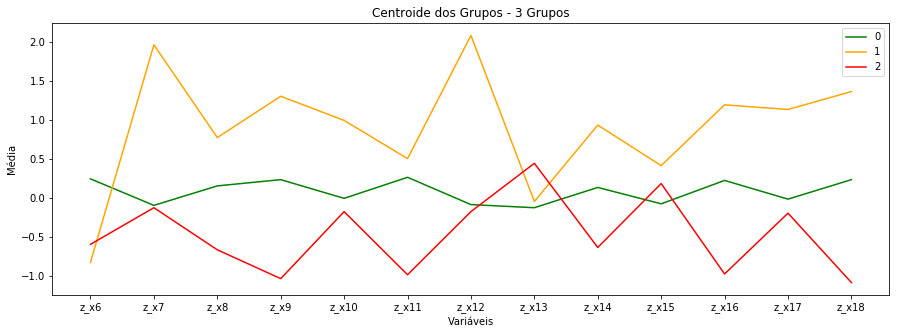

In [46]:
# Gera um gráfico de linhas dos centros dos grupos
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, grupo_3.loc[0], color='g')
plt.plot(z_variaveis, grupo_3.loc[1], color='orange')
plt.plot(z_variaveis, grupo_3.loc[2], color='red')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - 3 Grupos')
plt.legend(["0","1","2"], loc=1)
plt.show()

#### Perfil com Três  grupos

> - Observa-se que com a formação de grupos, o primeiro grupo foi composto por 73 indvíduos, o segundo com 5 indvídous e o terceiro, com 22 indivíduos. 
> - Observa-se também que os centros dos grupos formados são substancialmente diferentes uns dos outros.
> - A solução com três grupos é uma solução viável


#### Quatro Grupos

In [47]:
# Solução com 4 grupos, distância euclidiana quadrática e ligação completa (vizinho mais longe)
cluster = AgglomerativeClustering(n_clusters=4, affinity='sqeuclidean', linkage='complete')  

In [48]:
# Classificação de cada um dos 100 casos em um dos grupos (0, 1, 2 e 3)
cluster.fit_predict(df[z_variaveis])

array([3, 1, 1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 3, 1, 3, 1, 1, 3, 3, 3, 1, 0,
       1, 1, 3, 3, 1, 2, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 3, 2, 3, 1, 3, 0,
       1, 3, 1, 0, 1, 3, 2, 1, 1, 2, 3, 1, 0, 1, 1, 1, 1, 3, 2, 1, 1, 3,
       1, 3, 3, 2, 3, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 3, 2, 1,
       1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 3, 2], dtype=int64)

In [49]:
# Ajuste do agrupamento
cluster.fit(df[z_variaveis])

AgglomerativeClustering(affinity='sqeuclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=4, pooling_func='deprecated')

In [50]:
# Acerescenta uma coluna no DataFrame informando em qual grupo cada indivíduo foi alocado
df = pd.concat([df, pd.DataFrame(cluster.fit_predict(df[z_variaveis]), columns=['grupo_4'])], axis=1)

In [51]:
df.head(3)

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z_x12,z_x13,z_x14,z_x15,z_x16,z_x17,z_x18,mahala,grupo_3,grupo_4
0,1,2 - Entre 1 e 5 Anos,Indústria de Revista,2 - Grande (500+),Fora da América do Norte,Direto,8.5,3.9,2.5,5.9,...,0.821973,-0.113185,-1.646582,-0.572173,0.781230,0.408348,-0.254531,10.345972,0,3
1,2,3 - Acima de 5 Anos,Indústria de Jornal,1 - Pequena (0 to 499),USA/América do Norte,Indireto,8.2,2.7,5.1,7.2,...,-1.896068,-1.088915,-0.665744,-0.774117,-0.409009,-0.258342,1.387605,16.279348,0,1
2,3,3 - Acima de 5 Anos,Indústria de Revista,2 - Grande (500+),Fora da América do Norte,Direto,9.2,3.4,5.6,5.6,...,0.634522,-1.609304,0.192489,-0.370230,1.214044,-0.508351,0.840226,12.247606,0,1


In [52]:
# Quantidade de casos por grupo
df.groupby('grupo_4').count()['id']

grupo_4
0     5
1    47
2    22
3    26
Name: id, dtype: int64

In [53]:
# Cria um DataFrame para ser utilizado como semente no agrupamento não hierárquico
grupo_4 = df.groupby('grupo_4').mean()[z_variaveis].round(2)

In [54]:
grupo_4

,z_x6,z_x7,z_x8,z_x9,z_x10,z_x11,z_x12,z_x13,z_x14,z_x15,z_x16,z_x17,z_x18
grupo_4,,,,,,,,,,,,,
0,-0.83,1.96,0.77,1.30,0.99,0.50,2.08,-0.05,0.93,0.41,1.19,1.13,1.36
1,0.54,-0.42,0.47,0.14,-0.32,0.57,-0.43,-0.54,0.51,0.04,0.14,-0.54,0.09
2,-0.60,-0.13,-0.67,-1.04,-0.18,-0.99,-0.18,0.44,-0.64,0.18,-0.98,-0.20,-1.09
3,-0.32,0.49,-0.43,0.38,0.54,-0.29,0.53,0.61,-0.56,-0.31,0.35,0.92,0.50


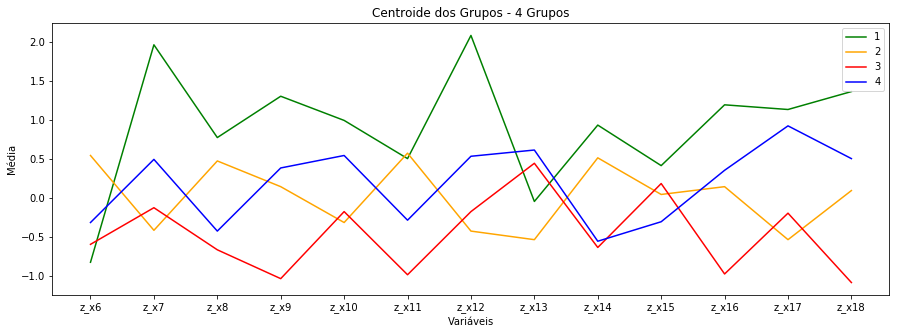

In [55]:
# Gera um gráfico de linhas dos centros dos grupos

plt.figure(figsize=(15,5))
plt.plot(z_variaveis, grupo_4.loc[0], color='g')
plt.plot(z_variaveis, grupo_4.loc[1], color='orange')
plt.plot(z_variaveis, grupo_4.loc[2], color='red')
plt.plot(z_variaveis, grupo_4.loc[3], color='blue')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - 4 Grupos')
plt.legend(["1","2","3", "4"], loc=1)
plt.show()

#### Perfil com Quatro  Grupos

> - Observa-se que com a formação de grupos, o primeiro grupo foi composto por 5 indvíduos, o segundo por 47 indvídous, o terceiro, por 22 indivíduos e o quarto, por 26 indivíduos. 
> - Observa-se também que os centros dos grupos formados são substancialmente diferentes uns dos outros, embora, para algumas das variáveis, para algum par de grupos, haja sobreposição.
> - A solução com 4 grupos é uma solução viável

> - A escolha por três ou quatro grupos se daria por outros fatores, como a quantidade de grupos que se desejasse trabalhar, o tamanho dos grupos ou outras condições, como a quantidade mínima de indivíduos por grupos.
> Neste caso, optou-se por **quatro** grupos e com estes parâmetros, será executado o procedimento de aglomeração não hierárquico **kmeans**

## Métodos de Agrupamentos Não Hierárquicos

> - O número de agrupamentos é definido a priori
> - O objetivo é encontrar diretamente uma partição de 𝑛 elementos em 𝑘 grupos (clusters), de modo que a partição satisfaça os seguintes requisitos:
>> - Coesão Interna (homogeneidade)
>> - Isolamento ou separação (heterogeneidade)
> - Não requerem o cálculo e armazenamento de uma nova matriz de distâncias a cada etapa
> - Duas decisões
>> - Como serão gerados os pontos sementes para os agrupamentos
>>> - Seleção ao acaso
>>> - Especificação pelo pesquisador  
>>> - Solução hierárquica (centroides – Pontos sementes)
>> - Qual o algoritmo de agrupamento será utilizado

#### k-Means

> - O algoritmo KMeans agrupa os casos tentando separar em n grupos de igual variância. O algoritmo requer que o número de clusters seja especificado.

<p>Bibliotecas e funções utilizadas:<br>
<a href="https://scikit-learn.org/stable/modules/clustering.html">scikit - clustering</a> <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans">sklearn.cluster.KMeans</a> <br>
</p>

In [56]:
# Execução do algoritmo kmeans para 4 grupos e a semente dos centros é o centróide obtido na análise hierárquica
kmeans = KMeans(n_clusters=4, init=grupo_4, n_init=1).fit(df[z_variaveis])

In [57]:
# Exibe os parâmetros da execução, incluído o centróide utilizado.
kmeans

KMeans(algorithm='auto', copy_x=True,
    init=         z_x6  z_x7  z_x8  z_x9  z_x10  z_x11  z_x12  z_x13  z_x14  z_x15  \
grupo_4
0       -0.83  1.96  0.77  1.30   0.99   0.50   2.08  -0.05   0.93   0.41
1        0.54 -0.42  0.47  0.14  -0.32   0.57  -0.43  -0.54   0.... 1.36
1         0.14  -0.54   0.09
2        -0.98  -0.20  -1.09
3         0.35   0.92   0.50  ,
    max_iter=300, n_clusters=4, n_init=1, n_jobs=None,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [58]:
# Agrupa cada um dos elementos da amostra em um dos 4 grupos possíveis.
y_kmeans = kmeans.predict(df[z_variaveis])

In [59]:
y_kmeans

array([3, 1, 1, 2, 1, 2, 2, 3, 3, 3, 1, 2, 0, 1, 3, 1, 3, 3, 3, 3, 2, 0,
       1, 1, 3, 3, 1, 2, 1, 3, 1, 2, 2, 3, 2, 2, 1, 1, 3, 3, 3, 3, 3, 0,
       1, 3, 1, 0, 1, 1, 2, 1, 1, 2, 3, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3,
       0, 3, 2, 3, 0, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 0, 1, 2, 1, 1, 2, 1, 3, 2, 0, 3])

In [60]:
# Rótulo de agrupamento para cada um dos casos
kmeans.labels_

array([3, 1, 1, 2, 1, 2, 2, 3, 3, 3, 1, 2, 0, 1, 3, 1, 3, 3, 3, 3, 2, 0,
       1, 1, 3, 3, 1, 2, 1, 3, 1, 2, 2, 3, 2, 2, 1, 1, 3, 3, 3, 3, 3, 0,
       1, 3, 1, 0, 1, 1, 2, 1, 1, 2, 3, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3,
       0, 3, 2, 3, 0, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 0, 1, 2, 1, 1, 2, 1, 3, 2, 0, 3])

In [61]:
# Atribui o grupo para cada um dos casos no DataFrame
df['kmeans'] = kmeans.labels_

In [62]:
df.head(3)

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z_x13,z_x14,z_x15,z_x16,z_x17,z_x18,mahala,grupo_3,grupo_4,kmeans
0,1,2 - Entre 1 e 5 Anos,Indústria de Revista,2 - Grande (500+),Fora da América do Norte,Direto,8.5,3.9,2.5,5.9,...,-0.113185,-1.646582,-0.572173,0.781230,0.408348,-0.254531,10.345972,0,3,3
1,2,3 - Acima de 5 Anos,Indústria de Jornal,1 - Pequena (0 to 499),USA/América do Norte,Indireto,8.2,2.7,5.1,7.2,...,-1.088915,-0.665744,-0.774117,-0.409009,-0.258342,1.387605,16.279348,0,1,1
2,3,3 - Acima de 5 Anos,Indústria de Revista,2 - Grande (500+),Fora da América do Norte,Direto,9.2,3.4,5.6,5.6,...,-1.609304,0.192489,-0.370230,1.214044,-0.508351,0.840226,12.247606,0,1,1


### Análise dos Resultados Gerados

In [63]:
# Quantidade de casos por grupo
lens = []
for i in np.sort(list(df['kmeans'].unique())):
    lens.append(len(df.loc[df['kmeans'] == i,:]))
    print("Cluster ", i, ": ", lens[i])

Cluster  0 :  9
Cluster  1 :  38
Cluster  2 :  26
Cluster  3 :  27


In [64]:
# Quantidade de casos por grupo
df.groupby('kmeans').count()['id']

kmeans
0     9
1    38
2    26
3    27
Name: id, dtype: int64

#### Tamanho dos Grupos

Ao verificar o tamanho dos grupos, precebe-se uma melhor distribuição dos indivíduos pelos grupos. O menor grupo tem 9% dos casos e o maior grupo, 38% dos casos.

In [65]:
# Gera o centroide final dos grupos.
k_means_centro = df.groupby('kmeans').mean()[z_variaveis].round(2)

In [66]:
k_means_centro

,z_x6,z_x7,z_x8,z_x9,z_x10,z_x11,z_x12,z_x13,z_x14,z_x15,z_x16,z_x17,z_x18
kmeans,,,,,,,,,,,,,
0,-0.39,1.78,0.64,0.97,0.86,0.26,1.72,0.13,0.91,0.42,0.99,0.93,1.01
1,0.78,-0.42,0.40,0.31,-0.29,0.82,-0.36,-0.73,0.49,0.01,0.32,-0.59,0.31
2,-0.44,-0.29,-0.14,-1.10,-0.41,-0.79,-0.40,0.31,-0.31,-0.12,-1.20,-0.54,-1.24
3,-0.54,0.27,-0.65,0.31,0.52,-0.47,0.32,0.69,-0.70,-0.04,0.37,1.04,0.42


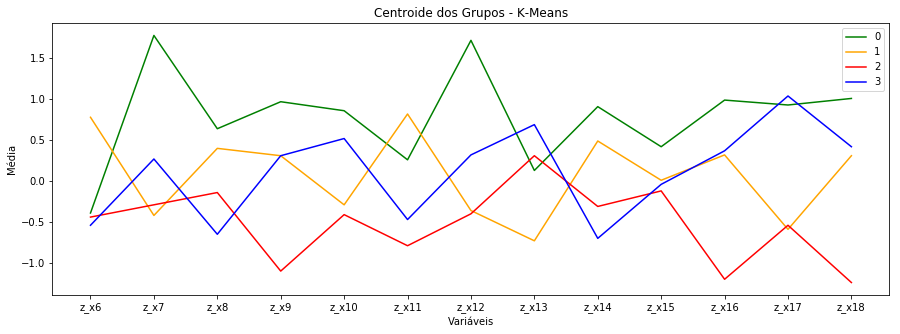

In [67]:
# Gera um gráfico de linhas dos centros dos grupos - KMeans

plt.figure(figsize=(15,5))
plt.plot(z_variaveis, k_means_centro.loc[0], color='g')
plt.plot(z_variaveis, k_means_centro.loc[1], color='orange')
plt.plot(z_variaveis, k_means_centro.loc[2], color='red')
plt.plot(z_variaveis, k_means_centro.loc[3], color='blue')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - K-Means')
plt.legend(["0","1","2", "3"], loc=1)
plt.show()

#### Centros dos Grupos

Ao verificar o centróide dos grupos, percebe-se que os grupos são substancialmente diferentes uns dos outros, indicando uma boa separação (heterogeneidade externa) dos grupos.

In [68]:
clusters_labels = pd.DataFrame(kmeans.labels_)
clusters_labels = clusters_labels.drop_duplicates().sort_values(0)

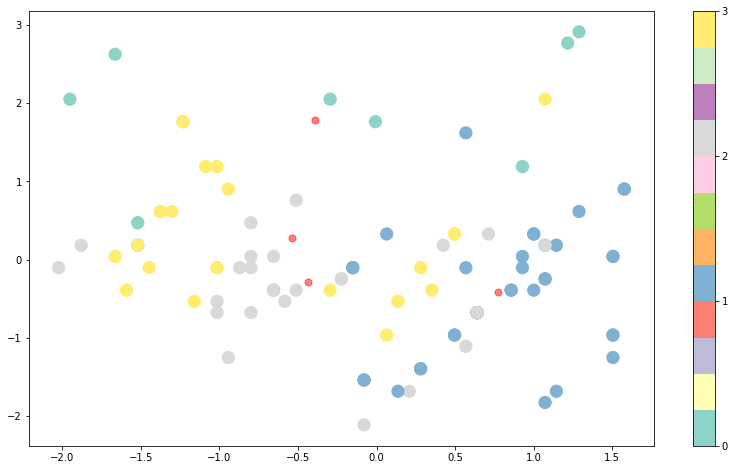

In [69]:
# Plota pares de variáveis e os centros dos grupos

plt.figure(figsize=(14, 8))
plt.scatter(df["z_x6"].tolist(), df["z_x7"].tolist(), c=y_kmeans, s=150,cmap='Set3')
plt.colorbar(spacing='uniform', ticks=clusters_labels)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5)

plt.show()

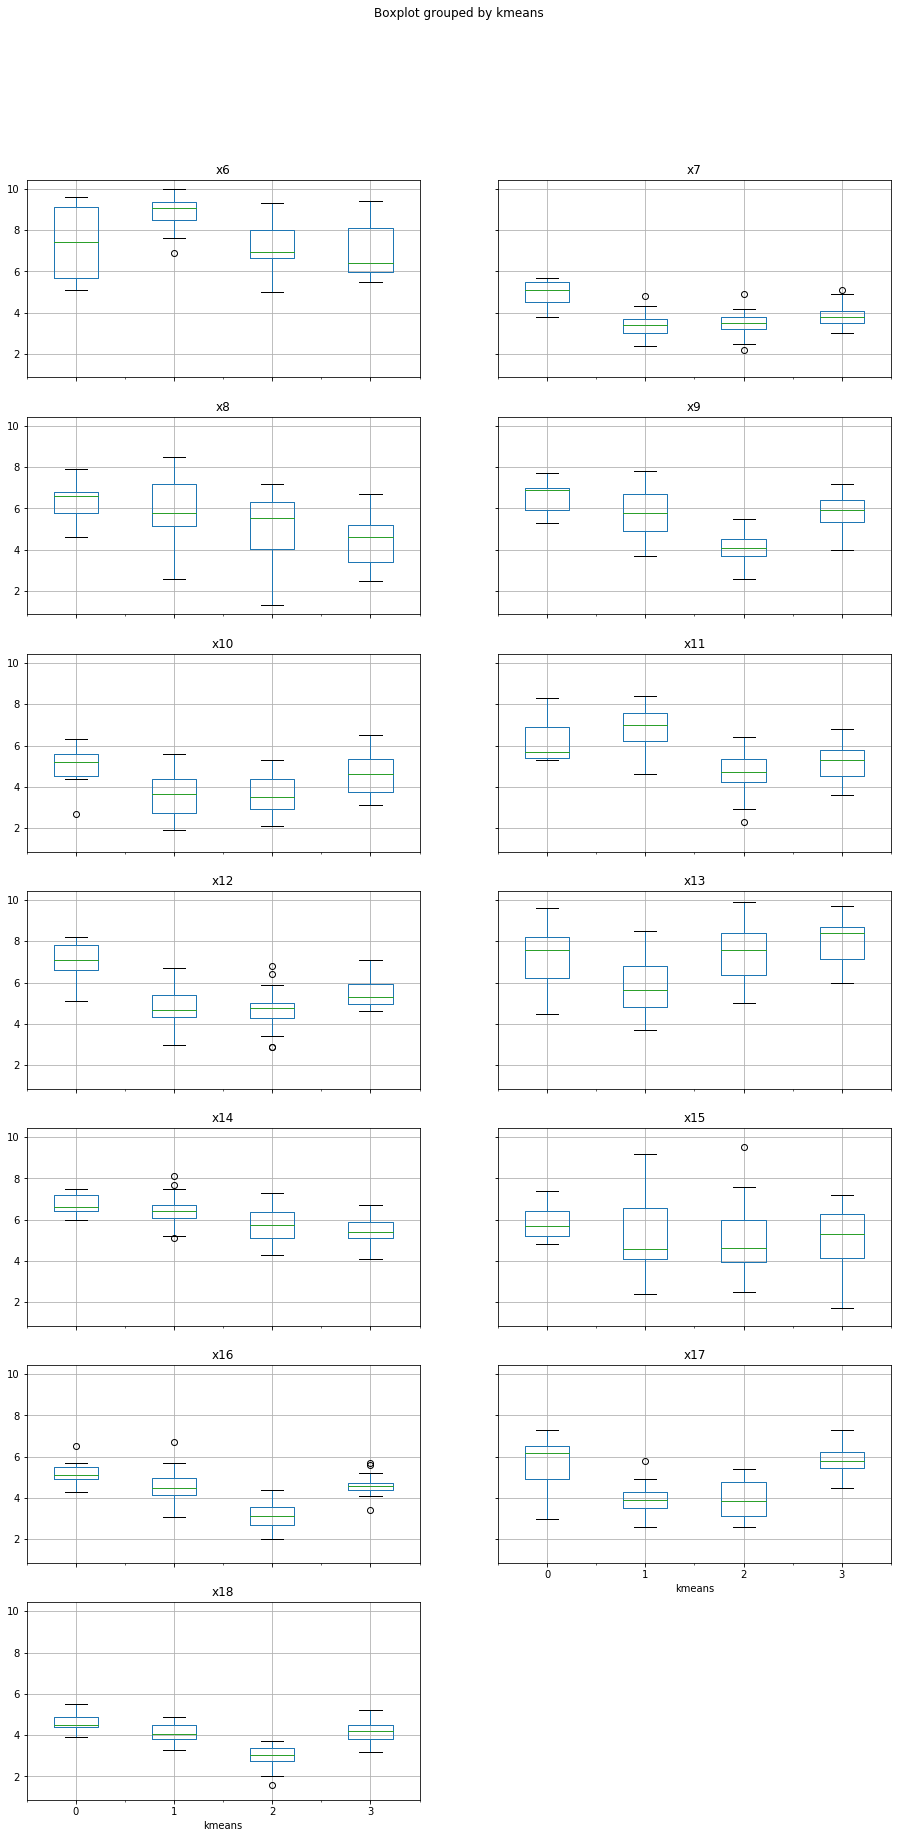

In [80]:
# Boxplot das variáveis originais por grupos.
boxplot = df.boxplot(column=variaveis, by='kmeans', layout=(7,2), figsize=[15,30], showfliers=True)

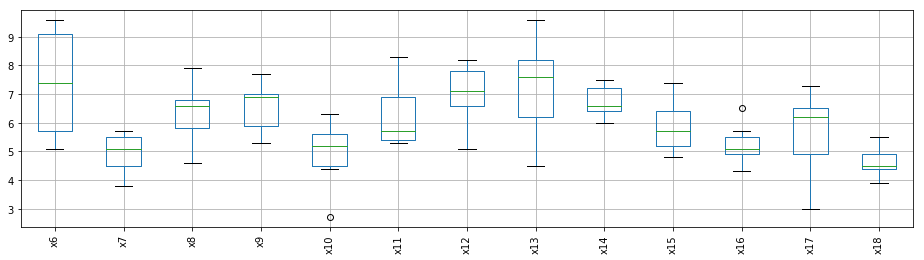

In [70]:
df_0 = df.loc[df['kmeans'] == 0]
df_0.loc[:,'x6':'x18'].boxplot(showfliers=True, figsize=[16,4], rot=90)

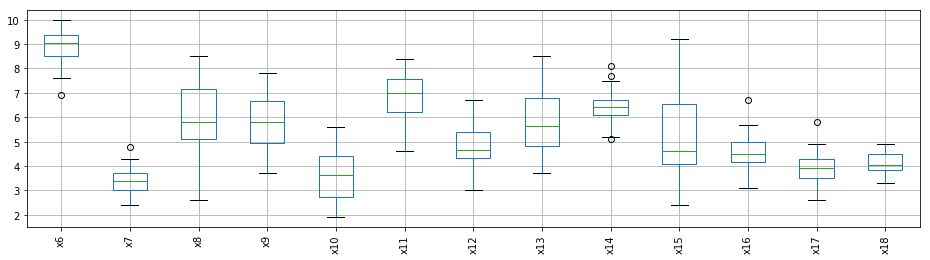

In [71]:
df_1 = df.loc[df['kmeans'] == 1]
df_1.loc[:,'x6':'x18'].boxplot(showfliers=True, figsize=[16,4], rot=90)

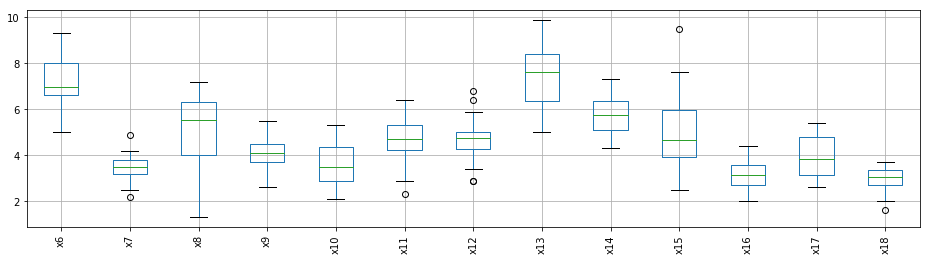

In [72]:
df_2 = df.loc[df['kmeans'] == 2]
df_2.loc[:,'x6':'x18'].boxplot(showfliers=True, figsize=[16,4], rot=90)

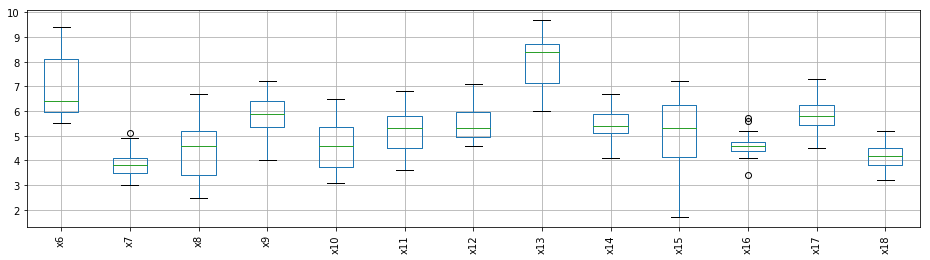

In [73]:
df_3 = df.loc[df['kmeans'] == 3]
df_3.loc[:,'x6':'x18'].boxplot(showfliers=True, figsize=[16,4], rot=90)

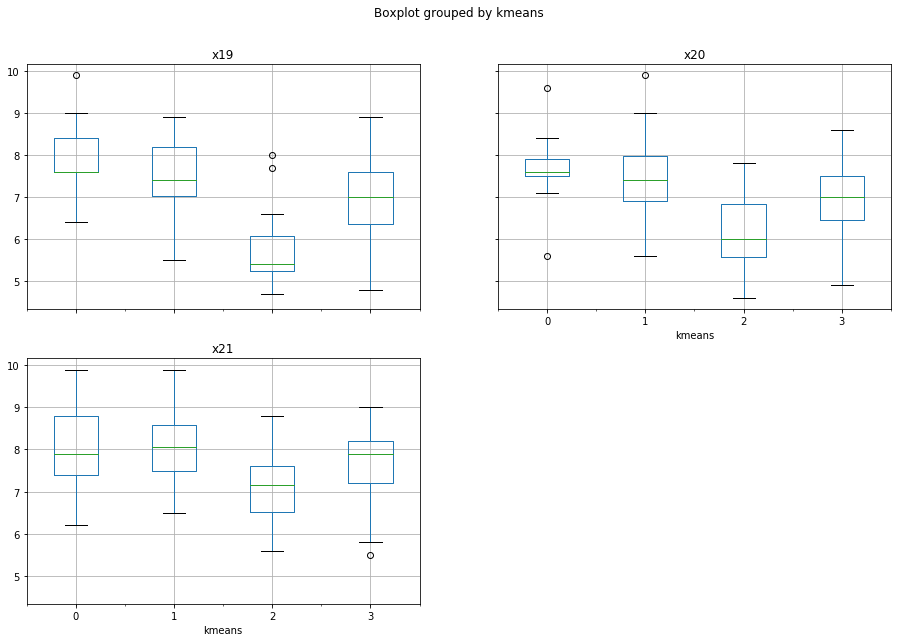

In [74]:
# BoxPlot das variáveis que não foram utilizadas na segmentação
boxplot = df.boxplot(column=['x19', 'x20','x21'], by='kmeans', layout=(2,2), figsize=[15,10], showfliers=True)

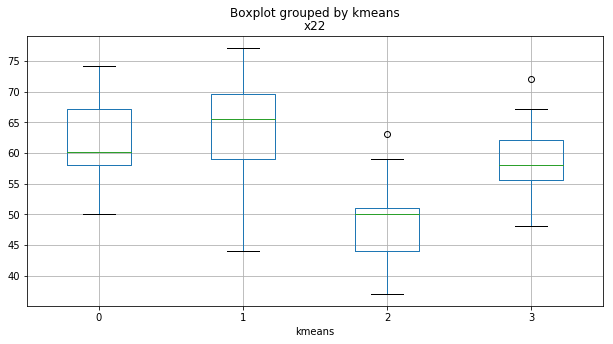

In [86]:
# BoxPlot das variáveis que não foram utilizadas na segmentação - Separado pois a escala é diferente das anteriores
boxplot = df.boxplot(column=['x22'], by='kmeans', figsize=[10,5])

Text(0.5, 1.0, 'x22')

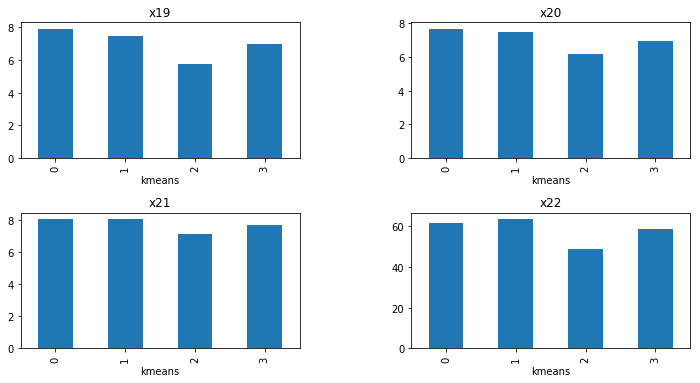

In [87]:
# Outra forma de visualizar as variáveis que não foram utilizadas na segmentação

fig = plt.figure(figsize=[12,6])
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2,2,1)
df_gr = df.groupby('kmeans').sum()['x19'] / lens
df_gr.plot(kind='bar')
plt.title('x19')

plt.subplot(2,2,2)
df_gr = df.groupby('kmeans').sum()['x20'] / lens
df_gr.plot(kind='bar')
plt.title('x20')

plt.subplot(2,2,3)
df_gr = df.groupby('kmeans').sum()['x21'] / lens
df_gr.plot(kind='bar')
plt.title('x21')

plt.subplot(2,2,4)
df_gr = df.groupby('kmeans').sum()['x22'] / lens
df_gr.plot(kind='bar')
plt.title('x22')

#### Análise da Variáveis Categóricas

<p>Bibliotecas e funções utilizadas:<br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html">pandas.crosstab</a> <br>
</p>



In [75]:
# Análise das Variáveis Categóricas - X1 - Valores Absolutos
pd.crosstab(df['kmeans'], df['x1'], rownames=['cluster'], colnames=['x1'], margins=True, margins_name='Total')

x1,1 - Menos de 1 Ano,2 - Entre 1 e 5 Anos,3 - Acima de 5 Anos,Total
cluster,,,,
0,1,6,2,9
1,3,7,28,38
2,23,2,1,26
3,5,20,2,27
Total,32,35,33,100


In [76]:
# Análise das Variáveis Categóricas - X1 - Valores Relativos
pd.crosstab(df['kmeans'], df['x1'], rownames=['cluster'], colnames=['x1'], normalize='index').round(2)

x1,1 - Menos de 1 Ano,2 - Entre 1 e 5 Anos,3 - Acima de 5 Anos
cluster,,,
0,0.11,0.67,0.22
1,0.08,0.18,0.74
2,0.88,0.08,0.04
3,0.19,0.74,0.07


In [77]:
# Análise das Variáveis Categóricas - X2 - Valores Relativos
pd.crosstab(df['kmeans'], df['x2'], rownames=['cluster'], colnames=['x2'], normalize='index').round(2)

x2,Indústria de Jornal,Indústria de Revista
cluster,,
0,0.78,0.22
1,0.42,0.58
2,0.50,0.50
3,0.44,0.56


In [78]:
# Análise das Variáveis Categóricas - X3 - Valores Relativos
pd.crosstab(df['kmeans'], df['x3'], rownames=['cluster'], colnames=['x3'], normalize='index').round(2)

x3,1 - Pequena (0 to 499),2 - Grande (500+)
cluster,,
0,0.56,0.44
1,0.68,0.32
2,0.46,0.54
3,0.22,0.78


In [79]:
# Análise das Variáveis Categóricas - X4 - Valores Relativos
pd.crosstab(df['kmeans'], df['x4'], rownames=['cluster'], colnames=['x4'], normalize='index').round(2)

x4,Fora da América do Norte,USA/América do Norte
cluster,,
0,0.89,0.11
1,0.24,0.76
2,0.73,0.27
3,0.93,0.07


In [80]:
# Análise das Variáveis Categóricas - X5 - Valores Relativos
pd.crosstab(df['kmeans'], df['x5'], rownames=['cluster'], colnames=['x5'], normalize='index').round(2)

x5,Direto,Indireto
cluster,,
0,0.67,0.33
1,0.61,0.39
2,0.23,0.77
3,0.30,0.70


#### Perfil dos Grupos Gerados - Resumo

> - Ao análisar os perfis dos grupos gerados, é possível observa que existem várias diferenças enre os perfis, apontando para o fato de os grupos formados serem realmente diferentes uns dos outros.
> - Observando as variáveis métricas utlizadas na segmentação (x6 a x18) a partir dos box-plots, do centróide e do diagrama de dispersão, é possível observar várias diferenças entre os grupos
> - Além das variáveis utilizadas na segmentação, ao analisar as variáveis x19, x20, x21 e x22, observa-se que estas variáveis tem comportamentos diferentes entre os grupos, mais uma vez, evidenciando a diferença entre os grupos formados.
> - Ao analisar as variáveis categóricas (x1 a x5), observa-se novamente boa separação entre os grupos. Por exemplo, ao analisar a longevidade dos clientes, é possível observar que 67% dos clientes do grupo 0 tem entre 1 e 5 anos de relacionamento, 74% dos clientes do grupo 1 têm mais de 5 anos de relacinamento, 88% dos clientes do grupo 2 têm até um ano de relacionamento e 74% dos clientes do grupo 3, têm entre 1 e 5 anos de relacionamento.



### ANOVA para Hierarquia das Variáveis

<p>Bibliotecas e funções utilizadas:<br>
<a href="https://www.statsmodels.org/stable/index.html">statsmodels</a> <br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html">scipy.stats.f_oneway</a> <br>
<a href="https://researchpy.readthedocs.io/en/latest/summary_cont_documentation.html">summary_cont</a> <br>
<a href="http://www.statsmodels.org/devel/generated/statsmodels.stats.anova.anova_lm.html">anova.anova_lm</a> <br>
</p>


<p>Fonte de Pesquisa:<br>
<a href="https://pythonfordatascience.org/anova-python/">anova-python</a> <br>
</p>


In [81]:
rs.summary_cont(df['x18'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,x18,100.0,3.886,0.734437,0.073444,3.740272,4.031728


In [95]:
F, p_value = st.f_oneway(df['z_x6'][df['kmeans'] == 0], 
                         df['z_x6'][df['kmeans'] == 1],
                         df['z_x6'][df['kmeans'] == 2],
                         df['z_x6'][df['kmeans'] == 3])

In [96]:
print('F:', F.round(3), '  p-valor: ', p_value.round(3) )

F: 18.826   p-valor:  0.0


In [97]:
formula = 'z_x6 ~ C(kmeans)'
model = ols(formula, df).fit()
aov_table = stm.stats.anova.anova_lm(model, typ=1)
print(aov_table)

             df     sum_sq    mean_sq          F        PR(>F)
C(kmeans)   3.0  37.040453  12.346818  18.826287  1.104302e-09
Residual   96.0  62.959547   0.655829        NaN           NaN


In [98]:
print(f"{'Variável':<10}{'QMC':>10}{'df1':>10}{'QME':>10}{'df2':>10}{'F':>10}{'p-valor':>10}\n")
for i in range(len(z_variaveis)):
    formula = z_variaveis[i] + '~ C(kmeans)'
    model = ols(formula, df).fit()
    aov_table = pd.DataFrame(stm.stats.anova.anova_lm(model, typ=1))
    print(f"{z_variaveis[i]:<10}{'{:.3f}'.format(aov_table.iloc[0,2].round(3)):>10}{'{:.0f}'.format(aov_table.iloc[0,0].round()):>10}\
{'{:.3f}'.format(aov_table.iloc[1,2].round(3)):>10}{'{:.0f}'.format(aov_table.iloc[1,0].round()):>10} \
{'{:.3f}'.format(aov_table.iloc[0,3].round(3)):>10}{'{:.3f}'.format(aov_table.iloc[0,4].round(3)):>10}") 


Variável         QMC       df1       QME       df2         F   p-valor

z_x6          12.347         3     0.656        96     18.826     0.000
z_x7          13.089         3     0.633        96     20.691     0.000
z_x8           7.272         3     0.814        96      8.929     0.000
z_x9          15.425         3     0.560        96     27.564     0.000
z_x10          7.161         3     0.818        96      8.756     0.000
z_x11         16.178         3     0.536        96     30.177     0.000
z_x12         12.785         3     0.642        96     19.911     0.000
z_x13         11.899         3     0.670        96     17.763     0.000
z_x14         10.739         3     0.706        96     15.210     0.000
z_x15          0.658         3     1.021        96      0.645     0.588
z_x16         17.847         3     0.484        96     36.880     0.000
z_x17         19.265         3     0.440        96     43.819     0.000
z_x18         19.163         3     0.443        96     43.274   

#### Tabela ANOVA

> - A tabela ANOVA não avalia se os agrupamentos são diferentes mas permite identificar qual ou quais variáveis  mais influenciam na separação dos grupos. 
> - Para uma variável conseguir distinguir bem os agrupamentos, espera-se que sua variabilidade entre os grupos seja alta (Cluster Mean Square) e a variabilidade interna (Error Mean Square) seja baixa. Quanto maior o valor de F, maior é a importância da variável
> - F = Cluster Mean Square / Error Mean Square
